# 第3部 モデリング道場

## 3.1 実際のモデリング

![alt text](fig/infer.png "infer")

結局，確率論的プログラミングにおいて，プログラマがやることは，

- パラメータの種類を決め，それぞれの確率分布を決める
- パラメータ込みで事前分布を数式で表す
- パラメータ込みで尤度を数式で表す
- データを用意する
- MCMCサンプリング法を選ぶ

あとは計算機がMCMCサンプリングをして，パラメータの推定値を返す．

## 3.2 コイン投げ - pymc3

In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled)


 [-----------------100%-----------------] 1000 of 1000 complete in 0.1 sec

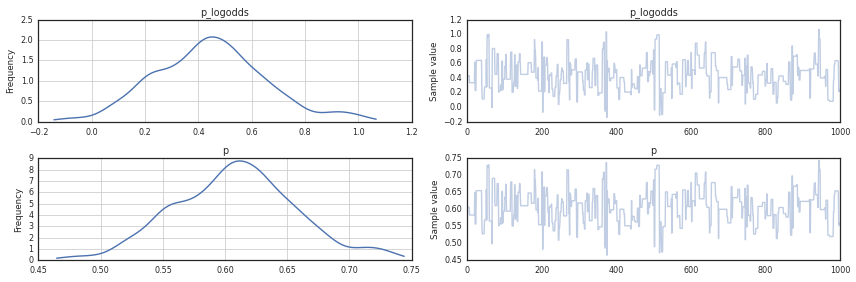

In [3]:
n = 100
h = 61
alpha = 2
beta = 2

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

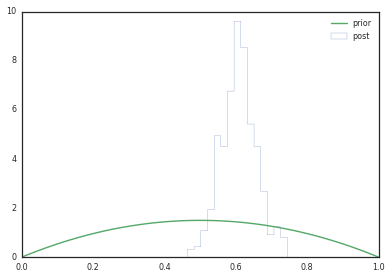

In [4]:
plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

## 3.3 コイン投げ - pystan

In [5]:
import pystan

coin_code = """
data {
    int<lower=0> n; // number of tosses
    int<lower=0> y; // number of heads
}
transformed data {}
parameters {
    real<lower=0, upper=1> p;
}
transformed parameters {}
model {
    p ~ beta(2, 2);
    y ~ binomial(n, p);
}
generated quantities {}
"""

coin_dat = {
             'n': 100,
             'y': 61,
            }

fit = pystan.stan(model_code=coin_code, data=coin_dat, iter=1000, chains=1)
#fit = pystan.stan(file='coin_code.stan', data=coin_dat, iter=1000, chains=1)

print(fit)

Inference for Stan model: anon_model_7f1947cd2d39ae427cd7b6bb6e6ffd77.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.61  3.9e-3   0.04   0.53   0.58   0.61   0.64    0.7    129    1.0
lp__  -70.2    0.06   0.67 -72.17 -70.36 -69.93 -69.78 -69.74    131   1.02

Samples were drawn using NUTS(diag_e) at Wed Oct  7 20:58:49 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


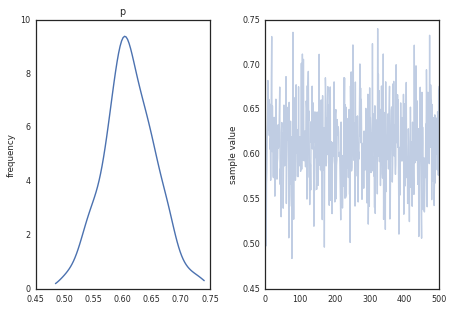

In [6]:
fit.plot('p');
plt.tight_layout()

In [7]:
coin_dict = fit.extract()
coin_dict.keys()

KeysView(OrderedDict([('p', array([ 0.6733,  0.6355,  0.6015,  0.4983,  0.5673,  0.581 ,  0.6186,
        0.6396,  0.6825,  0.6358,  0.6275,  0.6613,  0.6212,  0.6565,
        0.6061,  0.6174,  0.5713,  0.6161,  0.6866,  0.7314,  0.6033,
        0.6543,  0.6247,  0.576 ,  0.5743,  0.6277,  0.6414,  0.6314,
        0.5536,  0.6202,  0.608 ,  0.6617,  0.633 ,  0.5872,  0.5726,
        0.5913,  0.5961,  0.6331,  0.6072,  0.6093,  0.6239,  0.6514,
        0.6752,  0.5669,  0.5842,  0.5564,  0.5307,  0.6246,  0.6357,
        0.6155,  0.6236,  0.603 ,  0.5403,  0.6051,  0.6551,  0.6276,
        0.5874,  0.6055,  0.6326,  0.5996,  0.6868,  0.5455,  0.5904,
        0.6164,  0.6165,  0.6526,  0.6199,  0.6443,  0.5072,  0.6581,
        0.5424,  0.5549,  0.5856,  0.6371,  0.5668,  0.6019,  0.6197,
        0.4842,  0.577 ,  0.6113,  0.7361,  0.6323,  0.528 ,  0.6502,
        0.5851,  0.6437,  0.6635,  0.5715,  0.5957,  0.6777,  0.6018,
        0.628 ,  0.6254,  0.5756,  0.6012,  0.5754,  0.6756,  

## 3.4 モデリングいろいろ

- 正規分布 [normal_pymc](normal_pymc.ipynb) [normal_pystan](normal_pystan.ipynb)
- 線形回帰 [linreg_pymc](linreg_pymc.ipynb) [linreg_pystan](linreg_pystan.ipynb)
- ロジステック回帰 [gender_pymc](gender_pymc.ipynb) [gender_pystan](linreg_pystan.ipynb)
- 階層ベイズ [gelmanradon_pymc](gelmanradon_pymc.ipynb) 